<a href="https://colab.research.google.com/github/Lawrence-Krukrubo/Text-Based-AI/blob/master/trump_biden_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Exercise performs some basic Text Processing on the Last 2 Presidential debates between President Trump and Joe Biden.<br>It involves scraping the data and performing some text-preprocessing tasks to understand more about the words spoken by these two Aspirants, during the 2020 Presidential Debates.

[Debate_1](https://www.rev.com/blog/transcripts/donald-trump-joe-biden-1st-presidential-debate-transcript-2020)

[Debate_2](https://www.rev.com/blog/transcripts/donald-trump-joe-biden-final-presidential-debate-transcript-2020/amp)

In [487]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import nltk
from nltk import word_tokenize
nltk.download('stopwords') # For stopwords removal
nltk.download('punkt')  # for tokenization
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer  # To lemmatize sentences
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import spacy
from collections import defaultdict, Counter
from bs4 import BeautifulSoup
import requests
import string 
import math                                                                                                                                                      
print('All Imported!')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
All Imported!


In [363]:
debate_1 = "https://www.rev.com/blog/transcripts/donald-trump-joe-biden-1st-presidential-debate-transcript-2020"
debate_2 = 'https://www.rev.com/blog/transcripts/donald-trump-joe-biden-final-presidential-debate-transcript-2020/amp'

We need to scrape the data containing the texts from both debates.
Lets define a method that uses beautiful soup to parse the text data and returns two lists, of the interactions of both Trump and Biden.

In [364]:
def scrape_parse(link):
    """Scrape and preprocess text from rev.com,
        For Trump/Biden Presidential Debates
    
    @param,link: URL link to the website(rev.com)
    @return: Two lists (trump and biden)
    """
    source = requests.get(link).text
    soup = BeautifulSoup(source, 'lxml')
    texts = soup.findAll('p')
    corpus = [txt.text for txt in texts]

    if len(link) > 100:
        trump_corpus = [i for i in corpus if i.startswith('Donald')]
        biden_corpus = [i for i in corpus if i.startswith('Joe')]
        # Now we remove candidate names from start of each sentence
        trump_speech_list = [i[22:] for i in trump_corpus]
        biden_speech_list = [i[19:] for i in biden_corpus]
    else:
        trump_corpus = [i for i in corpus if i.startswith('President')]
        biden_corpus = [i for i in corpus if i.startswith('Vice')]
        # Now we remove candidate names from start of each sentence
        trump_speech_list = [i[35:] for i in trump_corpus]
        biden_speech_list = [i[34:] for i in biden_corpus]
        
    return trump_speech_list, biden_speech_list

In [365]:
# getting the list of speeches from the first debate
trump_debate_1, biden_debate_1 = scrape_parse(debate_1)

In [366]:
# getting the list of speeches for the second debate
trump_debate_2, biden_debate_2 = scrape_parse(debate_2)

Let's make these nltk text objects

In [367]:
trump_1 = nltk.Text(trump_debate_1)
trump_2 =  nltk.Text(trump_debate_2)
print(type(trump_1))

<class 'nltk.text.Text'>


In [368]:
biden_1 = nltk.Text(biden_debate_1)
biden_2 = nltk.Text(biden_debate_2)
print(type(biden_1))

<class 'nltk.text.Text'>


<h3>1. Let's see the percentage of times each person took the stage</h3>

In [369]:
first = {'Trump':[len(trump_debate_1)], 'Biden':[len(biden_debate_1)]}
second = {'Trump':[len(trump_debate_2)], 'Biden':[len(biden_debate_2)]}
first_df = pd.DataFrame(first)
second_df = pd.DataFrame(second)

In [370]:
# Let's make each a percent
total_stage1 = len(trump_debate_1 + biden_debate_1)
total_stage2 = len(trump_debate_2 + biden_debate_2)

# Let's use apply and lambda
first_df = first_df.apply(lambda x: round(x / total_stage1, 2))
second_df = second_df.apply(lambda x: round(x / total_stage2, 2))

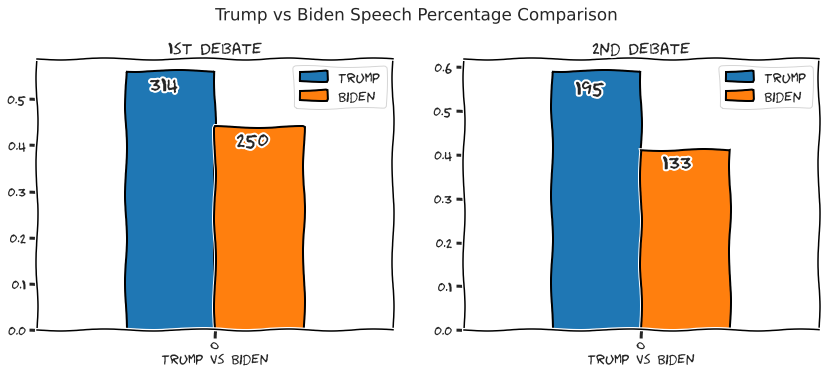

In [371]:
sns.set_style('ticks')
fig = plt.figure(figsize=(14,5)) # create figure
plt.suptitle('Trump vs Biden Speech Percentage Comparison', y=1.025)

plt.xkcd()

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

first_df.plot(kind='bar', edgecolor='black', linewidth=2, ax=ax0)
ax0.set_title('1st Debate')
ax0.set_xlabel('Trump vs Biden')
ax0.annotate('314', (-0.185, 0.52), fontsize=20, fontweight='bold')
ax0.annotate('250', (0.06, 0.4), fontsize=20, fontweight='bold')

second_df.plot(kind='bar', edgecolor='black', linewidth=2, ax=ax1)
plt.title('2nd Debate')
plt.xlabel('Trump vs Biden')
ax1.annotate('195', (-0.185, 0.54), fontsize=20, fontweight='bold')
ax1.annotate('133', (0.06, 0.37), fontsize=20, fontweight='bold')


plt.show()

#plt.rcdefaults()  # to stop xkcd plots

In [372]:
print(f'Trump spoke {len(trump_debate_1)} times in debate one and {len(trump_debate_2)} times in two.')
print(f'Biden spoke {len(biden_debate_1)} times in debate one and {len(biden_debate_2)} times in two.')

Trump spoke 314 times in debate one and 193 times in two.
Biden spoke 250 times in debate one and 133 times in two.


Let's clean the texts and remove punctuations and stopwords

In [373]:
def tokenize_words(corpus):
    word_list = []
    for sentence in corpus:
        word_list += word_tokenize(sentence)
    return word_list

In [374]:
def remove_punctuations(corpus):
    word_list = tokenize_words(corpus)
    words_noPunct = [i for i in word_list if i not in string.punctuation]
    return words_noPunct

In [375]:
def remove_stopwords(corpus):
    word_list = remove_punctuations(corpus)
    words_cleaned = [i for i in word_list if i not in stopwords.words('english')]
    return words_cleaned

For Trump...

In [376]:
trump_1 = remove_stopwords(trump_1)
trump_2 = remove_stopwords(trump_2)
trump_total_words = trump_1 + trump_2

# Now make these nltk text objects
trump_1 = nltk.text.Text(trump_1)
trump_2 = nltk.text.Text(trump_2)
trump_total_words = nltk.text.Text(trump_total_words)

For Biden...

In [377]:
biden_1 = remove_stopwords(biden_1)
biden_2 = remove_stopwords(biden_2)
biden_total_words = biden_1 + biden_2

# Now make these nltk text objects
biden_1 = nltk.text.Text(biden_1)
biden_2 = nltk.text.Text(biden_2)
biden_total_words = nltk.text.Text(biden_total_words)

<h3>2. Let's check the Lexical-richness or Diversity of the words spoken by Trump and Biden</h3>

In [378]:
def vocab(text):
    """find the unique tokens or vocab,
    In a given text object
    """
    vocabulary = list(set(text))
    return vocabulary

In [392]:
len(vocab(biden_total_words))

2026

In [380]:
def lexical_diversity(text):
    """find the ratio of the vocabulary to,
        total tokens in the text.
    """
    vocabulary = vocab(text)
    return round(len(vocabulary)/len(text), 2)

In [389]:
# For the word-count comparison
word_count_df = pd.DataFrame(columns=['Word_Count'], index=['Trump', 'Biden'])

for index, row in word_count_df.iterrows():
    if index is 'Trump':
        row['Word_Count'] = len(trump_total_words)
    else:
        row['Word_Count'] = len(biden_total_words)

# For the lexical diversity comparison
lex_var_df = pd.DataFrame(columns=['Lexical-Diversity'], index=['Trump', 'Biden'])

for index, row in lex_var_df.iterrows():
    if index is 'Trump':
        row['Lexical-Diversity'] = lexical_diversity(trump_total_words)
    else:
        row['Lexical-Diversity'] = lexical_diversity(biden_total_words)
lex_var_df

,Lexical-Diversity
Trump,0.21
Biden,0.25


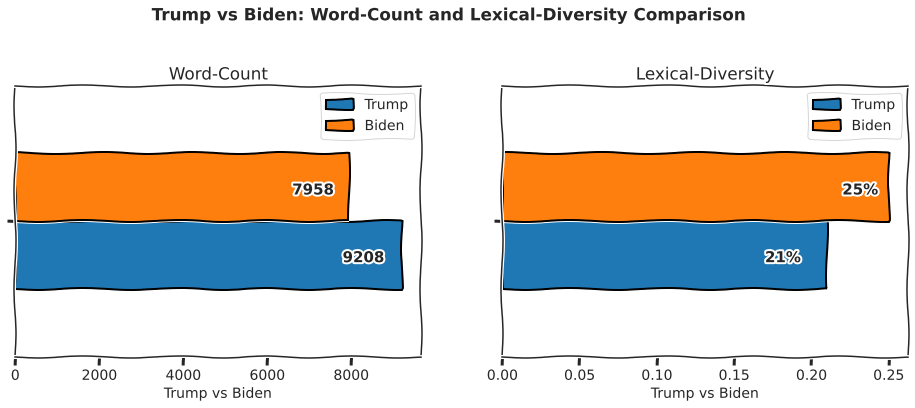

In [390]:
sns.set_style('ticks')
fig = plt.figure(figsize=(16,5)) # create figure
plt.suptitle('Trump vs Biden: Word-Count and Lexical-Diversity Comparison', y=1.1, fontweight='bold')

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

word_count_df.T.plot(kind='barh', edgecolor='black', linewidth=2, ax=ax0)
ax0.set_title('Word-Count')
ax0.set_xlabel('Trump vs Biden')
ax0.set_yticklabels('')
ax0.annotate('7958', (6600, 0.099), fontsize=15, fontweight='bold')
ax0.annotate('9208', (7800, -0.15), fontsize=15, fontweight='bold')

lex_var_df.T.plot(kind='barh', edgecolor='black', linewidth=2, ax=ax1)
plt.title('Lexical-Diversity')
plt.xlabel('Trump vs Biden')
ax1.set_yticklabels('')
ax1.annotate('25%', (0.22, 0.099), fontsize=15, fontweight='bold')
ax1.annotate('21%', (0.17, -0.15), fontsize=15, fontweight='bold')

plt.show()

1. Trump utters a total 9208 words(rid of stopwords and punctuations) comprising of 1893 unique words, giving a Lexical-Richness score of 21%.

2. Biden utters a total 7958 words(rid of stopwords and punctuations) comprising of 2026 unique words, giving a Lexical-Richness score of 25%.

3. Know that in both debates Trump utters more words than Biden in a ratio of roughly (55:45) in first debate and (60:40) in second debate.


3. <h3>TFIDF for both Presidential Candidates</h3>

So what are the candidates even talking about, are there any relatively unique areas to each candidate, as deductible from the words spoken at these debates?... Let's find out using TFIDF.

In [393]:
# First let's lemmatize the words to achieve a similar base “stem” for a word

def lemmatize_words(word_list):
    lemma = WordNetLemmatizer()
    lemmatized = [lemma.lemmatize(i) for i in word_list]
    
    return lemmatized

In [397]:
trump_lemma = lemmatize_words(trump_total_words)
biden_lemma = lemmatize_words(biden_total_words)

Next, we create a simple TFIDF class for the documents

In [449]:
class Tfidf(object):
    """instantiate a Tfidf object to compute TF-IDF scores
        across a corpus of text documents.
    """
    def __init__(self, docs, doc_names):
        self.docs = docs
        self.doc_names = doc_names
        
    def _tf(self, word, doc):
        lenOfDoc = len(doc)
        if lenOfDoc < 1: return 0
        else: return doc.count(word) / lenOfDoc

    def _contains(self, word, docs):
        return sum(1 for doc in docs if word in doc)

    def _idf(self, word, docs):
        docsCount = self._contains(word, docs)
        if docsCount < 1 : return 0
        else: return math.log(len(docs) / docsCount)

    def tfidf(self):
        print('-----------------------------------------------------------')
        master = {}
        for i, doc in enumerate(docs):
            print("Top words in document {}".format(doc_names[i]))
            master[doc_names[i]] = {}
            scores = {word: (self._tf(word,doc) * self._idf(word, docs)) for word in doc}
            sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
            for word, score in sorted_words[:10]:
                print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))
                master[doc_names[i]][word] = [round(score, 6)]
            print()
        return master

In [450]:
# Let's instantiate a Tfidf class object
text_docs = Tfidf(docs, doc_names)

In [451]:
# Let's get the TFIDF summary for Trump and Biden
tfidf_summary = text_docs.tfidf()

-----------------------------------------------------------
Top words in document Trump-Corpus
	Word: ago, TF-IDF: 0.00128
	Word: Chris, TF-IDF: 0.00098
	Word: places, TF-IDF: 0.00098
	Word: months, TF-IDF: 0.00098
	Word: built, TF-IDF: 0.00098
	Word: nobody, TF-IDF: 0.0009
	Word: gave, TF-IDF: 0.0009
	Word: called, TF-IDF: 0.0009
	Word: cages, TF-IDF: 0.00083
	Word: disaster, TF-IDF: 0.00075

Top words in document Biden-Corpus
	Word: create, TF-IDF: 0.00096
	Word: folks, TF-IDF: 0.00087
	Word: federal, TF-IDF: 0.00087
	Word: serious, TF-IDF: 0.00078
	Word: home, TF-IDF: 0.00078
	Word: running, TF-IDF: 0.0007
	Word: situation, TF-IDF: 0.0007
	Word: Americans, TF-IDF: 0.0007
	Word: God, TF-IDF: 0.00061
	Word: reason, TF-IDF: 0.00061



Let's see the dictionary of top 10 TFIDF words from Trump and Biden

In [452]:
tfidf_summary

{'Biden-Corpus': {'Americans': [0.000697],
  'God': [0.00061],
  'create': [0.000958],
  'federal': [0.000871],
  'folks': [0.000871],
  'home': [0.000784],
  'reason': [0.00061],
  'running': [0.000697],
  'serious': [0.000784],
  'situation': [0.000697]},
 'Trump-Corpus': {'Chris': [0.000979],
  'ago': [0.00128],
  'built': [0.000979],
  'cages': [0.000828],
  'called': [0.000903],
  'disaster': [0.000753],
  'gave': [0.000903],
  'months': [0.000979],
  'nobody': [0.000903],
  'places': [0.000979]}}

Let's create a DataFrame from these dicts and also prepare for the word-cloud

In [478]:
biden_tfidf = pd.DataFrame(tfidf_summary['Biden-Corpus']).T
biden_tfidf.columns = ['Val']
biden_tfidf.head()

,Val
create,0.000958
folks,0.000871
federal,0.000871
serious,0.000784
home,0.000784


In [479]:
trump_tfidf = pd.DataFrame(tfidf_summary['Trump-Corpus']).T
trump_tfidf.columns = ['Val']
trump_tfidf.head()

,Val
ago,0.001280
Chris,0.000979
places,0.000979
months,0.000979
built,0.000979


Next, let's define a method that iterates through the data frames and returns a list of words multiplied by their weights for the word-cloud

In [480]:
def find_cloud_list(df):
    df['Pct'] = df['Val'].apply(lambda x: x * 100000)
    df['Pct'] = round((df['Pct'].apply(lambda x: x / sum(df.Pct)))*100, 2)

    master_list = []

    for index, row in df.iterrows():
        y = (index+',') * int(row['Pct'])
        x = y.split(',')[:-1]
        master_list.extend(x)
    
    return master_list

In [481]:
trump_cloud_list = find_cloud_list(trump_tfidf)
biden_cloud_list = find_cloud_list(biden_tfidf)

In [493]:
# download file and save as alice_novel.txt
!wget --quiet https://ibm.box.com/shared/static/m54sjtrshpt5su20dzesl5en9xa5vfz1.txt -O alice_novel.txt

# open the file and read it into a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()
    
print ('File downloaded and saved!')

print(type(alice_novel))

File downloaded and saved!
<class 'str'>


145190

Plotting the word-cloud objects

In [542]:
def plot_word_cloud(text_list, color):
    # Creating a mask of the American Flag for the word-cloud
    #char_mask = np.array(Image.open('sample_data/usa_map_PNG1.png'))
    strr = ''
    for i in text_list:
        strr+=i
        strr+=','

    # Instantiate the word-cloud object
    wc = WordCloud(background_color=color, max_words=len(strr))

    # Generate the word-cloud object
    wc.generate(strr)

    # plot the word-cloud
    fig = plt.figure()
    fig.set_figwidth(14) # set width
    fig.set_figheight(18) # set height

    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

Let's see Trump's TFIDF word-cloud

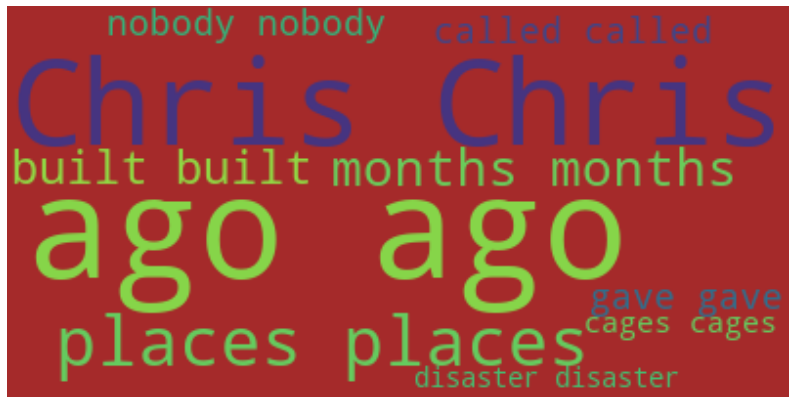

In [540]:
plot_word_cloud(trump_cloud_list, 'brown')

Let's see Biden's TFIDF word-cloud

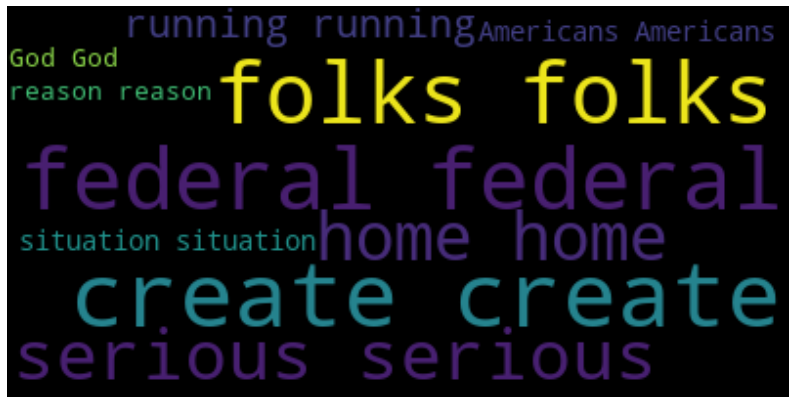

In [541]:
plot_word_cloud(biden_cloud_list, 'black')

<h3>4. Questions and Answers...</h3>

Let's look at some of the questions thrown by the moderators Chris Wallace(1st debate) and Kristen Welker(2nd debate)... As well as some of the responses from Trump and Biden